In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
customers_df=pd.read_csv('customers.csv')
items_df=pd.read_csv('Items.csv')
orders_df=pd.read_csv('orders.csv')
order_item_df=pd.read_csv('order_item.csv')

customer_df_clean = customers_df.dropna()
items_df_clean = items_df.dropna()
orders_df_clean = orders_df.dropna()
order_items_clean = order_item_df.dropna().copy()
order_items_clean['item_id'] = order_items_clean['item_id'].astype(int)
order_items_clean.rename(columns={'id': 'order_item_id'},inplace=True)


In [2]:
# 3. Add a total_price column to the order_item table, calculating the purchase cost (product price * quantity)
order_item_merged=order_items_clean.merge(items_df_clean, left_on='item_id', right_on='id', how='inner')
order_item_merged['total_price']=order_item_merged['quantity']*order_item_merged['item_price']
order_item_merged.sort_values('order_id')

,order_item_id,order_id,item_id,quantity,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability,total_price
456,728,1,34,5,34,HDMI Cable,Cables,1710.84,869.0,JBL,True,8554.20
437,699,2,11,3,11,Blu-Ray Player,Video Players and Recorders,3382.86,704.0,ASUS,True,10148.58
176,271,3,34,4,34,HDMI Cable,Cables,1710.84,869.0,JBL,True,6843.36
83,125,4,4,1,4,Smartphone,Mobile Devices and Accessories,965.20,201.0,Bose,True,965.20
317,512,5,7,9,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True,21300.48
...,...,...,...,...,...,...,...,...,...,...,...,...
621,996,594,24,2,24,Drone,Televisions and Displays,4449.99,443.0,Samsung,True,8899.98
373,604,597,34,1,34,HDMI Cable,Cables,1710.84,869.0,JBL,True,1710.84
37,55,599,6,5,6,Printer,Printers and Office Equipment,4175.99,971.0,Sony,True,20879.95
36,54,599,31,7,31,Wireless Charger,Mobile Devices and Accessories,241.54,951.0,Lenovo,True,1690.78


In [3]:
# 4. Display each purchase and its total price
order_total_groups=order_item_merged.groupby('order_id')['total_price'].sum().reset_index()
orders_total_price=orders_df_clean.merge(order_total_groups,on='order_id',how='left')
orders_total_price.dropna(inplace=True)
orders_total_price

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE,8554.20
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE,10148.58
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE,6843.36
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE,965.20
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE,28174.78
...,...,...,...,...,...,...,...,...
477,589,233.0,44 Cardinal Terrace,3.0,2023-05-01,GIFT_CARD,WEBSITE,29349.43
478,591,126.0,2962 Susan Street,4.0,2023-06-08,GIFT_CARD,WEBSITE,14803.42
479,594,480.0,242 Brown Avenue,6.0,2023-02-18,GIFT_CARD,STORE,54186.82
482,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE,1710.84


In [4]:
# 5.Find what is the most expensive purchase? The cheapest? The average?
display("most expensive purchase",orders_total_price.sort_values(by='total_price', ascending=False).head(1))
display("cheapest purchase",orders_total_price.sort_values(by='total_price', ascending=True).head(1))
avg_total_prices=orders_total_price['total_price'].mean()
closest_idx = (orders_total_price['total_price'] - avg_total_prices).abs().idxmin()
display("clostest avg purchase",orders_total_price.loc[[closest_idx]])

'most expensive purchase'

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price
22,24,433.0,3 Melvin Point,3.0,2023-05-25,GIFT_CARD,WEBSITE,69581.82


'cheapest purchase'

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price
250,306,451.0,9137 Lunder Avenue,4.0,2023-08-30,CASH,STORE,241.54


'clostest avg purchase'

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price
189,233,214.0,3954 Heffernan Way,5.0,2023-10-27,CREDIT_CARD,WEBSITE,11862.69


In [9]:
# 6. pivot table:Show how many customers belong to each gender within that nationality.
pd.pivot_table(
    customer_df_clean,
    index='nationallity',
    columns='gender',
    values='id',
    aggfunc='count',
    fill_value=0 
)

gender,Agender,Bigender,Female,Genderfluid,Genderqueer,Male,Non-binary,Polygender
nationallity,,,,,,,,
Argentina,1,0,8,1,0,6,0,1
Brazil,0,0,5,0,0,15,2,1
Chile,1,0,10,0,0,8,0,0
China,0,0,4,1,1,7,0,0
France,0,0,14,1,0,9,0,0
Germany,0,0,12,0,0,3,0,1
India,0,0,5,0,0,9,0,0
Isreal,1,1,19,5,1,24,0,2
Italy,0,0,13,0,1,10,0,0


In [31]:
customer_df_clean

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,2022-11-01,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,NaT,999-994-0510,hbrewerton1@discovery.com
3,4,Frannie,Morewood,Male,84.0,France,NaT,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,NaT,991-853-9984,sfleet4@unicef.org
5,6,Janine,Voak,Female,52.0,United States,2020-02-08,589-929-6244,jvoak5@php.net
...,...,...,...,...,...,...,...,...,...
494,495,Reinold,MacLeese,Male,39.0,Brazil,2022-09-01,129-480-3270,rmacleesedq@chronoengine.com
496,497,Kalina,Luno,Female,30.0,Italy,NaT,659-768-2522,klunods@friendfeed.com
497,498,Viv,Callander,Female,44.0,France,NaT,447-685-9318,vcallanderdt@icq.com
498,499,Georg,Raper,Male,41.0,Germany,NaT,863-207-4830,graperdu@homestead.com


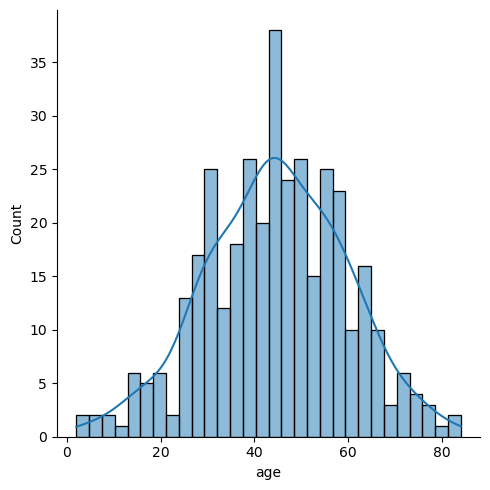

In [19]:
# Research and present in a graph the following details:
# 3.Histogram of customer distribution by age
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.displot(data=customer_df_clean, x='age', bins=30,  kde=True)  # histogram. y = count
plt.show()

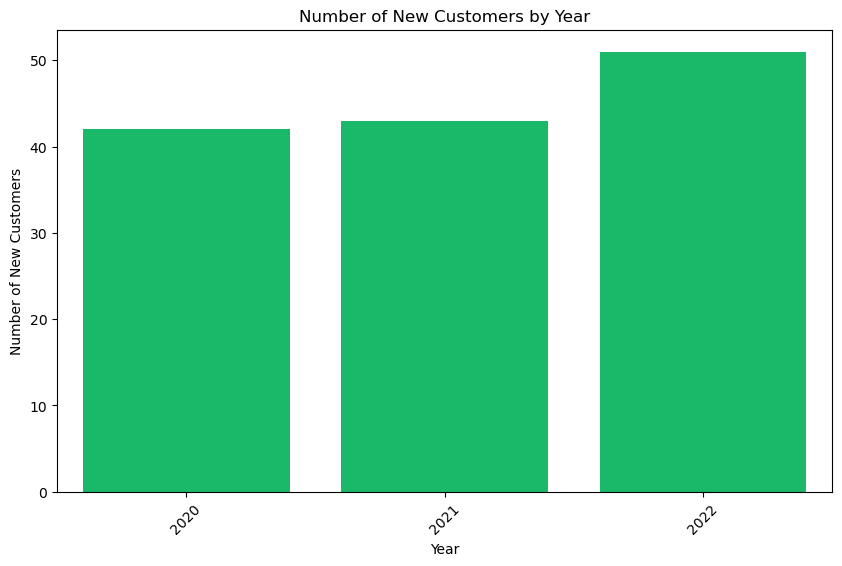

In [73]:
# 4.Graph showing the quantity of new customers who joined, by year

customer_df_clean = customer_df_clean.copy()
customer_df_clean['joining_date'] = pd.to_datetime(customer_df_clean['joining_date'], errors='coerce')
customer_df_clean.dropna(subset=['joining_date'],inplace=True)
customer_df_clean['joining_year'] = customer_df_clean['joining_date'].dt.year
customers_per_year = customer_df_clean.groupby('joining_year')['id'].count().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=customers_per_year, x='joining_year', y='id', color='#00d269')
plt.title('Number of New Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.show()

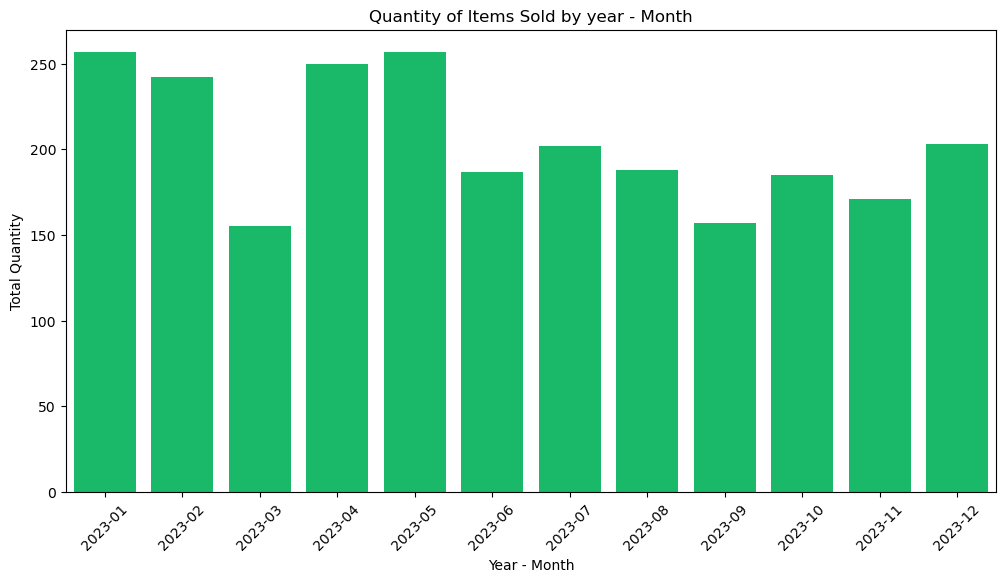

In [97]:
# 5. Graph showing the quantity of sales by months
orders_df_clean=orders_df_clean.copy()
order_items_clean=order_items_clean.copy()
orders_df_clean['order_date'] = pd.to_datetime(orders_df_clean['order_date'], errors='coerce')
order_items_with_date = order_items_clean.merge(orders_df_clean[['order_id', 'order_date']], on='order_id', how='inner')
order_items_with_date['year_month'] = order_items_with_date['order_date'].dt.to_period('M').astype(str)
quantity_per_month = order_items_with_date.groupby('year_month')['quantity'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=quantity_per_month, x='year_month', y='quantity', color='#00d269')
plt.title('Quantity of Items Sold by year - Month')
plt.xlabel('Year - Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()

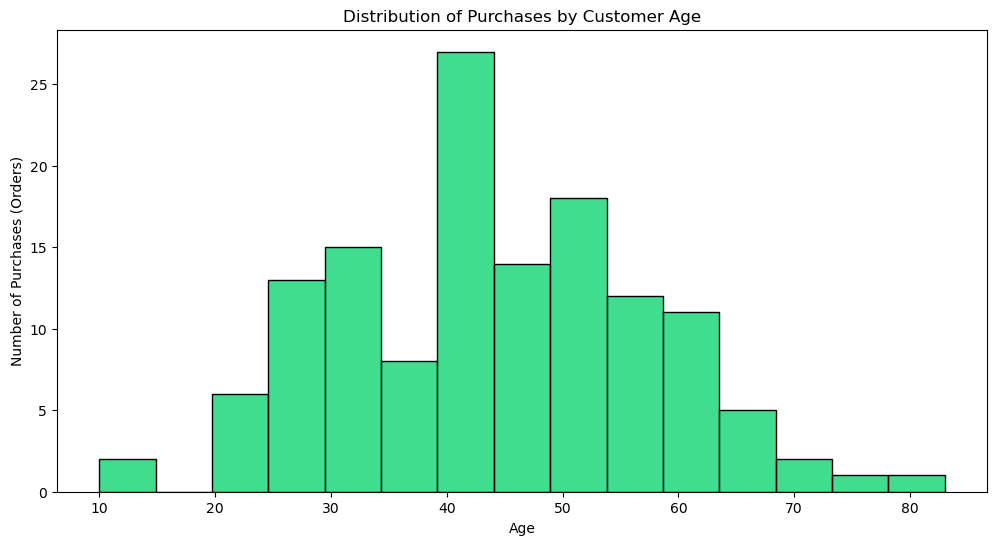

In [111]:
# 6. Histogram showing the distribution of purchase quantities by age (each purchase should be calculated in a single row. No need to count product quantities, etc.) - Is there more/less purchasing in certain age groups?
orders_with_age = orders_df_clean.merge(customer_df_clean[['id', 'age']], left_on='customer_id', right_on='id', how='inner')
orders_with_age
plt.figure(figsize=(12,6))
sns.histplot(orders_with_age['age'], bins=15, kde=False, color='#00d269')
plt.title('Distribution of Purchases by Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Purchases (Orders)')
plt.show()